<a href="https://colab.research.google.com/github/Rohit1217/Vq_vae/blob/main/trainvqvae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import TensorDataset,DataLoader

from datasets_gen import get_mnist_
from vq_vae import VQ_VAE
from loss_vq_vae import vqloss

In [2]:
def get_device():
  return torch.device("cuda" if torch.cuda.is_available() else "cpu")
Device=get_device()

In [3]:
data=get_mnist_(normalize=True)
traindata=TensorDataset(data,data)
trainloader=DataLoader(traindata,batch_size=128,shuffle=True)

In [4]:
model=VQ_VAE()
model=model.to(Device)
epochs=100
criterion=vqloss(0.2)
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
for name, param in model.named_parameters():
  print(name,param.data)
  ac=param.data.clone()
  break

In [10]:
loss_list=[]
gradients = []
for epoch in range(epochs):
  total_loss=0
  count=0
  code=model.codebook.codebook
  for input,target in trainloader:
    input,target=input.to(Device),target.to(Device)
    b,w,h=input.shape
    input,target=input.view(b,1,w,h),target.view(b,1,w,h)
    pred=model(input)
    loss=criterion(pred[0],pred[1],pred[2],target)

    total_loss+=loss.item()
    count+=1

    #print(loss.item(),count)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  #print(torch.sum(model.codebook.codebook-code))

  #if epoch % 3 == 0:
      #named_params = [(name, param.grad.abs().mean().item()) for name, param in model.named_parameters()]
      #gradients.append(named_params)


  print(f'total_loss={total_loss},avg_loss={total_loss/count},epoch={epoch}')

total_loss=28758.44454574585,avg_loss=61.31864508687814,epoch=0
total_loss=28729.573650360107,avg_loss=61.25708667454181,epoch=1


KeyboardInterrupt: 

In [ ]:
print(torch.sum(model.codebook.codebook-ac))

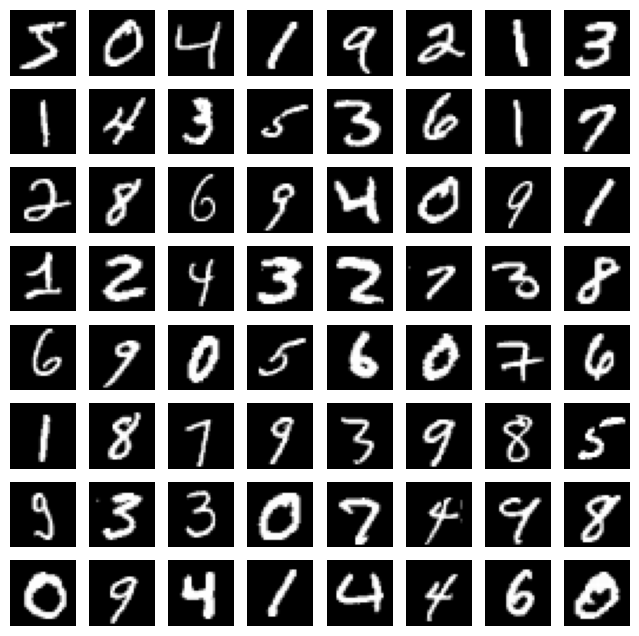

In [7]:
x=data[:64].to(Device)
x=x.view(64,1,28,28)
#x=model(x)[2]
#print(x[0])
#x=(x*0.5+0.5)*255.0
x = x[:64].view(8, 8, 28, 28)
x = x.detach().to('cpu')
image_np = x.numpy()

# Create a figure and a set of subplots arranged in an 8x8 grid
fig, axes = plt.subplots(8, 8, figsize=(8, 8))

# Iterate through the subplots and display each image
for i in range(8):
    for j in range(8):
        axes[i, j].imshow(image_np[i, j], cmap='gray')
        axes[i, j].axis('off')  # Turn off axis labels

plt.show()

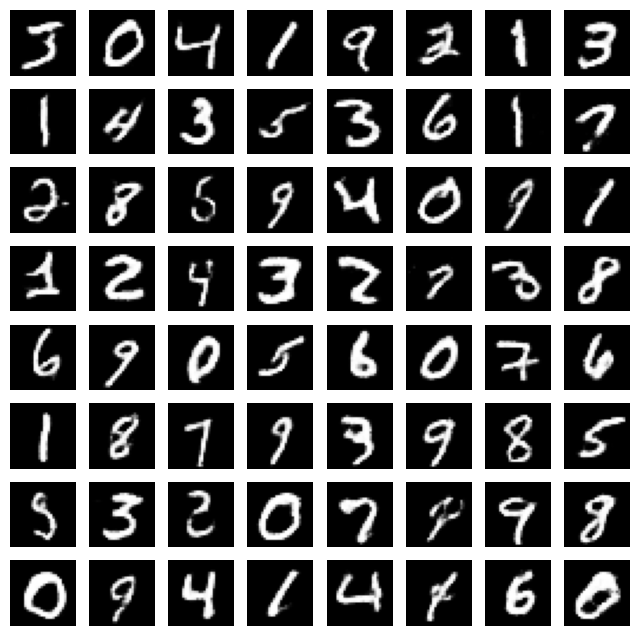

In [11]:
with torch.no_grad():
  model.eval()
  x=data[:64].to(Device)
  x=x.view(64,1,28,28)
  x=model(x)[2]
  #print(x)
  #print(x[0])
  #x=(x*0.5+0.5)*255.0
  x = x[:64].view(8, 8, 28, 28)
  x = x.detach().to('cpu')
  image_np = x.numpy()

  # Create a figure and a set of subplots arranged in an 8x8 grid
  fig, axes = plt.subplots(8, 8, figsize=(8, 8))

  # Iterate through the subplots and display each image
  for i in range(8):
      for j in range(8):
          axes[i, j].imshow(image_np[i, j], cmap='gray')
          axes[i, j].axis('off')  # Turn off axis labels

  plt.show()

In [ ]:
for name, param in model.named_parameters():
  print(name,param.grad,param.data)

In [ ]:
torch.save(gradients, 'gradients.pt')

# Load the saved gradients
gradients = torch.load('gradients.pt')

# Plot line graphs of the gradients
for i, named_params in enumerate(gradients):
    names, magnitudes = zip(*named_params)
    plt.plot(names, magnitudes, label=f'Epoch {i*3}')

plt.xlabel('Parameter')
plt.ylabel('Gradient Magnitude')
plt.legend()
plt.show()